In [2]:
%matplotlib inline

import pickle 
import matplotlib.pyplot as plt 
from sklearn import ensemble, cross_validation, linear_model, metrics

plt.style.use( 'bmh' ) 

In [3]:
with open( 'feature_sets/scaled.pkl', 'rb' ) as fn:
    features = pickle.load( fn ) 

In [4]:
targets, feature_sets = zip( *features.keys() )
targets = set( targets ) 
feature_sets = set( feature_sets ) 

Feature set: feature_sets/harmonic_cst.csv
Target: kcat


/usr/local/bin/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


Target: km
Target: tm
Target: kcatkm
Feature set: feature_sets/rosetta_runs_ddg_monomer.csv
Target: kcat
Target: km
Target: tm
Target: kcatkm
Feature set: feature_sets/rosetta_runs_benchmark.csv
Target: kcat
Target: km
Target: tm
Target: kcatkm
Feature set: feature_sets/foldx_runs_pssm.csv
Target: kcat
Target: km
Target: tm
Target: kcatkm


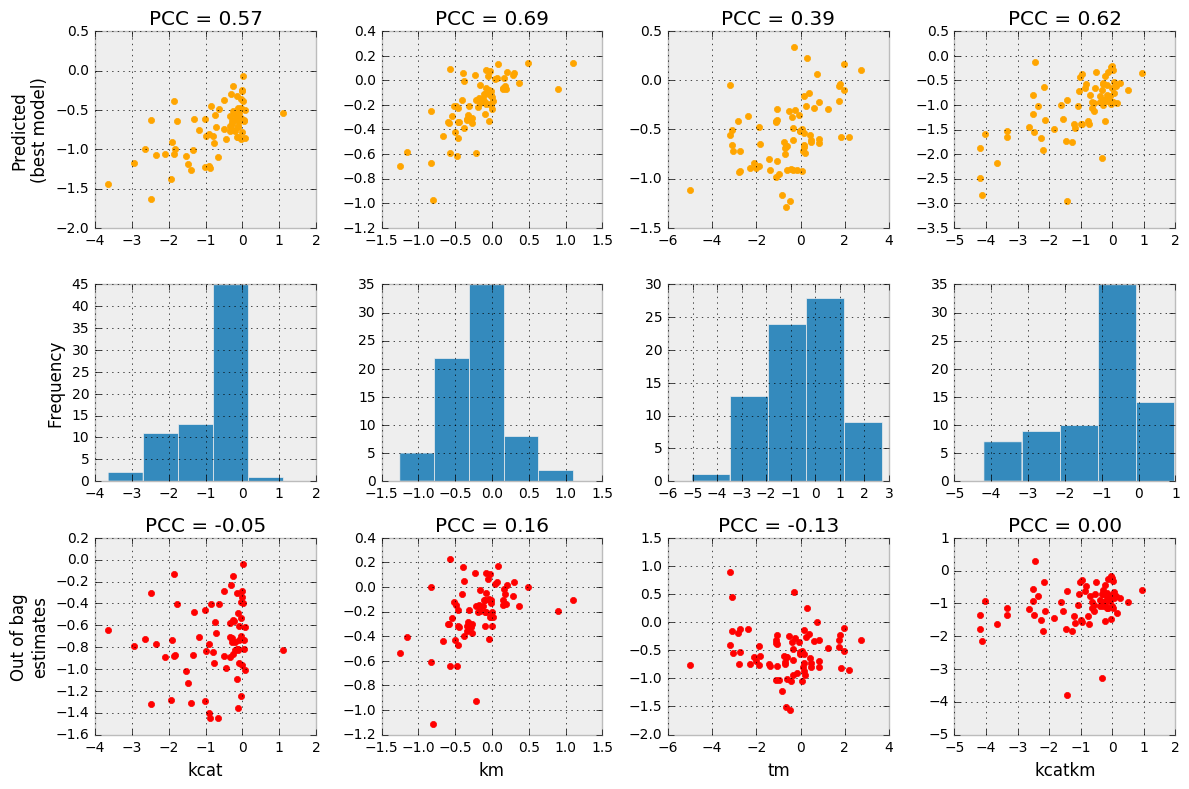

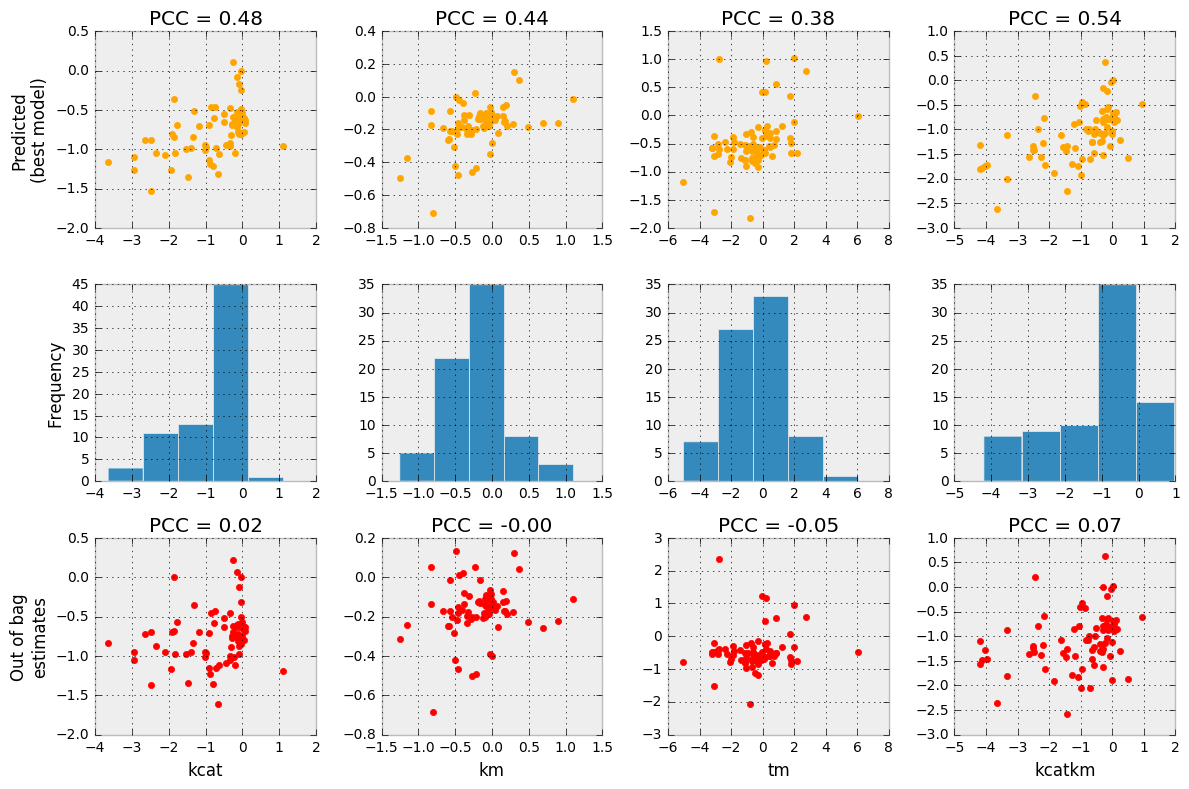

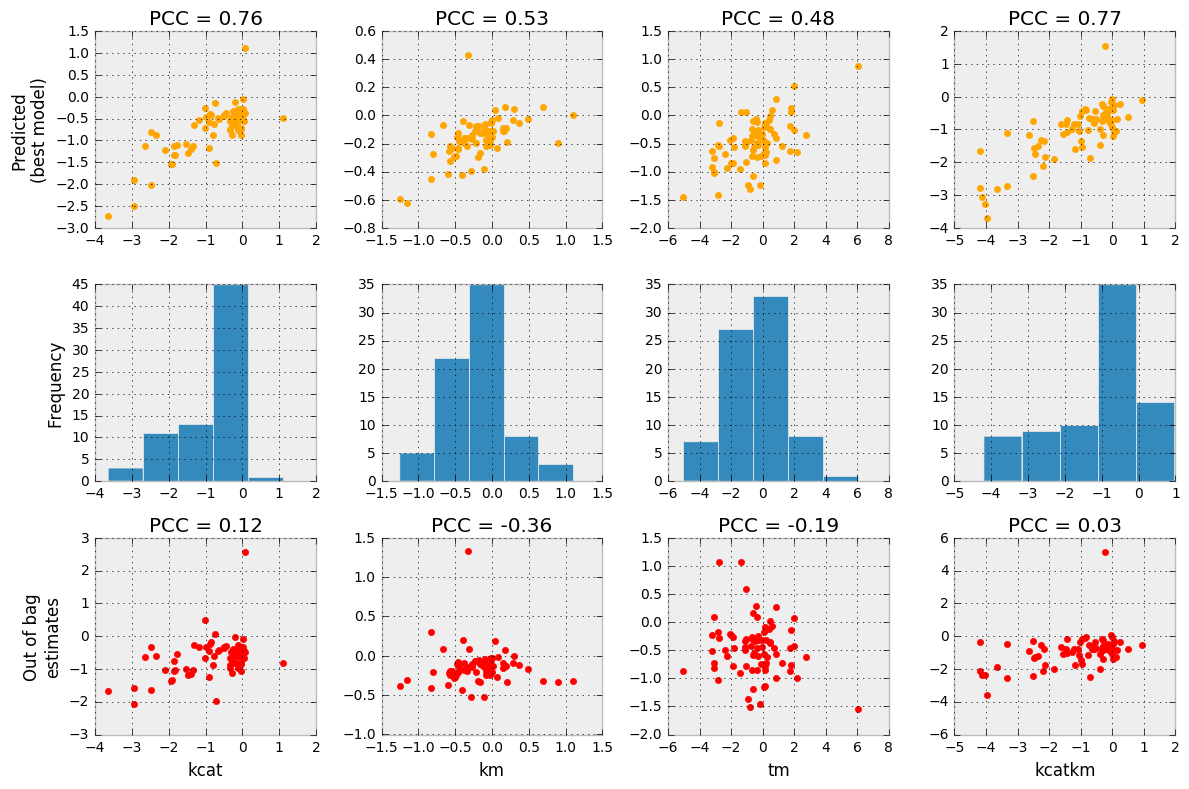

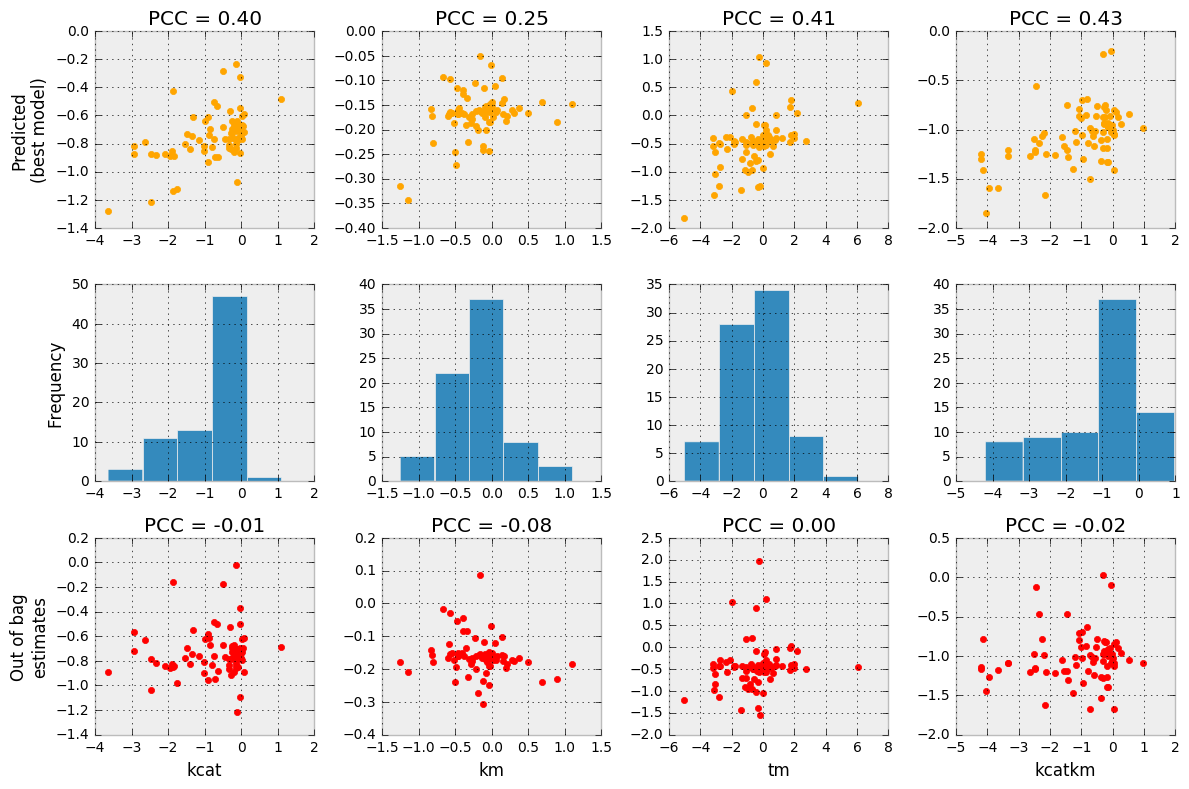

In [5]:
for i, f_set in enumerate( feature_sets ):
    print( 'Feature set:', f_set ) 
    fig, ax = plt.subplots( nrows=3, ncols=len( targets ), figsize=(12,8) )
    fig.suptitle( f_set ) 
    for j, t in enumerate( targets ):
        print( 'Target:', t ) 
    
        # get data 
        X, y, J = features[ ( t, f_set ) ] 
        
        # train elastic net model
        skf = cross_validation.StratifiedKFold( y, n_folds=5, shuffle=True ) 
        net = linear_model.ElasticNetCV( cv=skf, max_iter=1e9, selection='random' ) 
        bag = ensemble.BaggingRegressor( net, n_estimators=250, n_jobs=-1, oob_score=True ) 
        bag.fit( X, y ) 
        preds = bag.predict( X )
        pred_score = metrics.r2_score( y, preds ) ** 0.5
    
        # plot results 
        ax[0,j].set_title( t ) 
        ax[0,j].scatter( y, bag.predict( X ), color='orange' )
        ax[0,j].set_title( 'PCC = {0:2.2f}'.format( pred_score ) )
        ax[1,j].hist( y, bins=5 ) 
        ax[2,j].scatter( y, bag.oob_prediction_, color='red' )
        ax[2,j].set_title( 'PCC = {0:2.2f}'.format( bag.oob_score_ ) ) 
        ax[2,j].set_xlabel( t ) 

    ax[0,0].set_ylabel( 'Predicted\n(best model)' )
    ax[1,0].set_ylabel( 'Frequency' )
    ax[2,0].set_ylabel( 'Out of bag\nestimates' )
    fig.tight_layout()    